test results on our test data: 
      yield
0  0.684706
1  0.766471
2  0.004706
3 -0.422941
[-0.1536131  -0.48631653 -0.62422734 -0.51474935]
adjusted predictions: 
[2.257981257583702, 1.3505155761034089, 0.9017371160102234, 0.7349798188363952]
          0
0  2.257981
1  1.350516
2  0.901737
3  0.734980
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     15.10
Date:                Mon, 10 Jul 2023   Prob (F-statistic):             0.0603
Time:                        09:51:41   Log-Likelihood:                0.97371
No. Observations:                   4   AIC:                             2.053
Df Residuals:                       2   BIC:                            0.8252
Df Model:                           1                          

/home/jmvance/miniconda3/envs/ctgan/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/jmvance/miniconda3/envs/ctgan/lib/python3.9/site-packages/sktime/performance_metrics/forecasting/_classes.py:469: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/jmvance/miniconda3/envs/ctgan/lib/python3.9/site-packages/sktime/performance_metrics/forecasting/_classes.py:469: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/jmvance/miniconda3/envs/ctgan/lib/python3.9/site-packages/sktime/performance_metrics/forecasting/_classes.py:469: UserWarning: y_pred and y_

(0.22621659840841865, 0.9397119768231365)

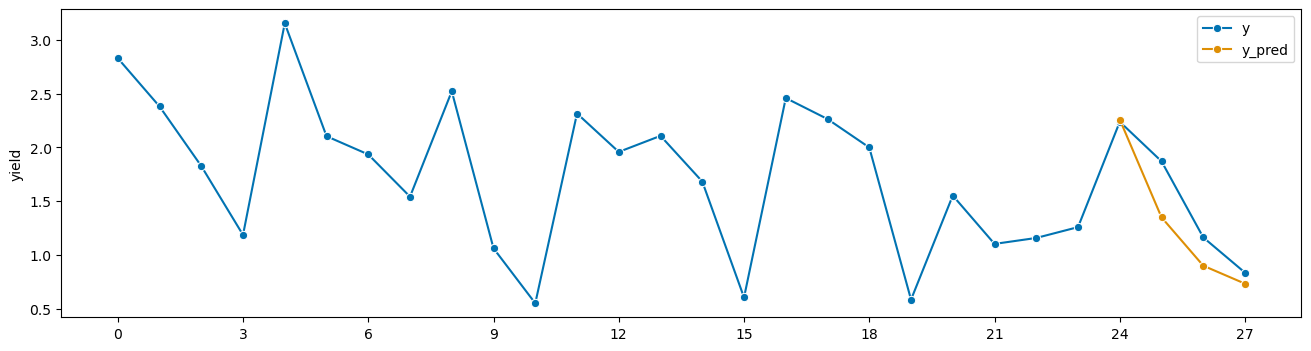

In [1]:
import joblib
import pandas as pd
# import the API
APILoc = 'API/'

import sys
sys.path.insert(0, APILoc)

from API import *

# get aggregate data
targetDataLoc = '~/ctgan/data/ts_Fictionville_OH_18_vvlo_rain_stat.csv'
targetDf = pd.read_csv(targetDataLoc)
boostDataLoc = '~/ctgan/data/ts_Fictionville_OH_10_to_15_stat.csv'
boostDf = pd.read_csv(boostDataLoc)
targetDf.head()

xColumnsToKeep = ["radiation","rain", "avg_max_temp", "avg_min_temp"]
yColumnsToKeep = ["yield"]
test_xDf = targetDf[xColumnsToKeep]
boost_xDf = boostDf[xColumnsToKeep]
test_yDf = targetDf[yColumnsToKeep]
boost_yDf = boostDf[yColumnsToKeep]

# reset the index
xTest = test_xDf.reset_index(drop=True)
yTest = test_yDf.reset_index(drop=True)
boost_xDf = boost_xDf.reset_index(drop=True)
boost_yDf = boost_yDf.reset_index(drop=True)

all_years_Loc = '~/ctgan/data/ts_NB_OH_10_to_18_no15_no17_class_mv_idx_ylds.csv'
all_yearsDf = pd.read_csv(all_years_Loc)
final_year_Loc = '~/ctgan/data/NB_OH_avg_ylds_for_math_mv_10_to_16.csv'
final_yearDf = pd.read_csv(final_year_Loc)
final_yearDf.head()
target_year_Loc = '~/ctgan/data/ts_NB_OH_2018_ylds_mv_idx.csv'
target_yearDf = pd.read_csv(target_year_Loc)

model = joblib.load('working_dir/xgbTup_070923_3.pkl')
actualTest(all_yearsDf, final_yearDf, target_yearDf, boost_xDf, boost_yDf, xTest, yTest, model[0])